In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [35]:
df = pd.read_csv("iris.csv", index_col = 'Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.shape

(150, 5)

In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Univariate Analysis

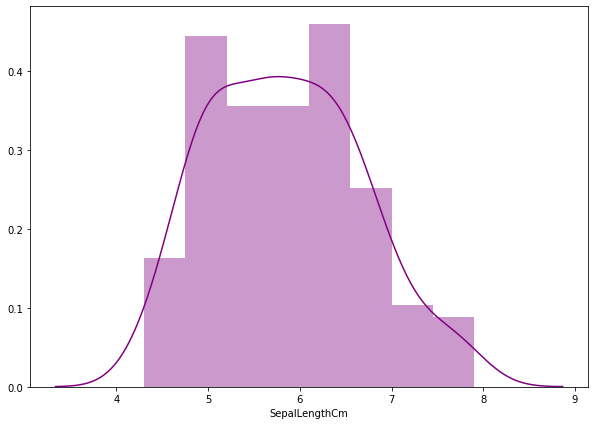

In [9]:
plt.figure(figsize = (10, 7))
sns.distplot(df.SepalLengthCm, color = "purple")
plt.show()

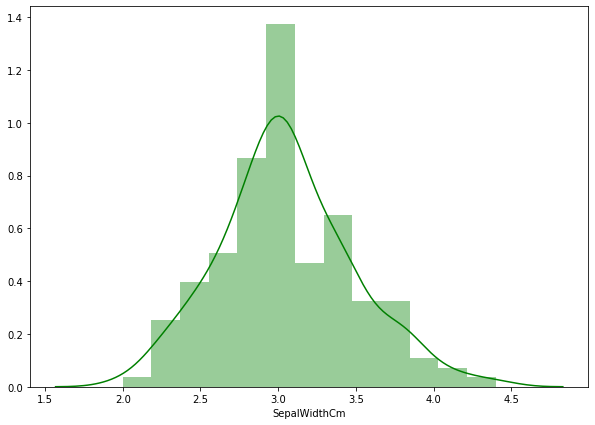

In [10]:
plt.figure(figsize = (10, 7))
sns.distplot(df.SepalWidthCm, color="green")
plt.show()

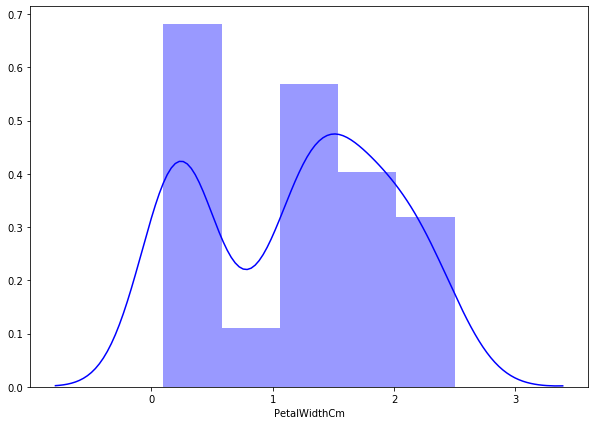

In [11]:
plt.figure(figsize = (10, 7))
sns.distplot(df.PetalWidthCm, color="blue")
plt.show()

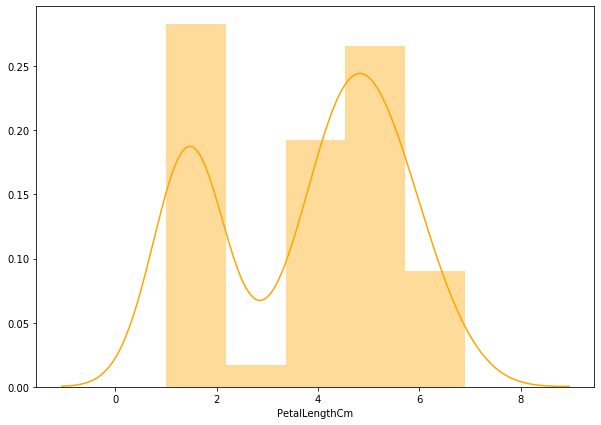

In [12]:
plt.figure(figsize = (10, 7))
sns.distplot(df.PetalLengthCm, color = "orange")
plt.show()

### Bivariate Analysis

In [13]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


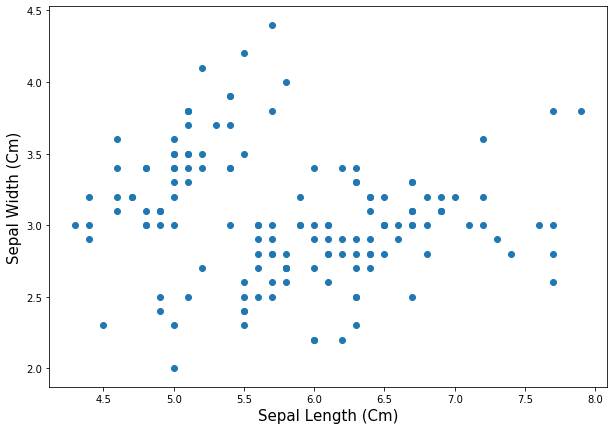

In [14]:
#Scatter plots between the variables

plt.figure(figsize = (10, 7))
plt.scatter(df.SepalLengthCm, df.SepalWidthCm)
plt.xlabel("Sepal Length (Cm)", fontsize=15)
plt.ylabel("Sepal Width (Cm)", fontsize=15)
#z = np.polyfit(df.SepalLengthCm, df.SepalWidthCm, 1)
#p = np.poly1d(z)
#plt.plot(df.SepalLengthCm, p(df.SepalLengthCm))
plt.show()

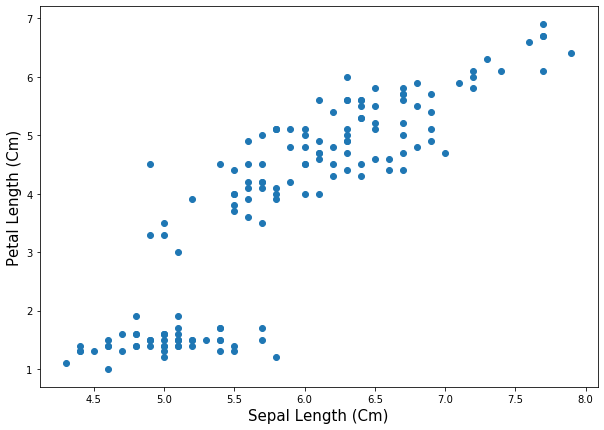

In [15]:
plt.figure(figsize = (10, 7))
plt.scatter(df.SepalLengthCm, df.PetalLengthCm)
plt.xlabel("Sepal Length (Cm)", fontsize=15)
plt.ylabel("Petal Length (Cm)", fontsize=15)
plt.show()

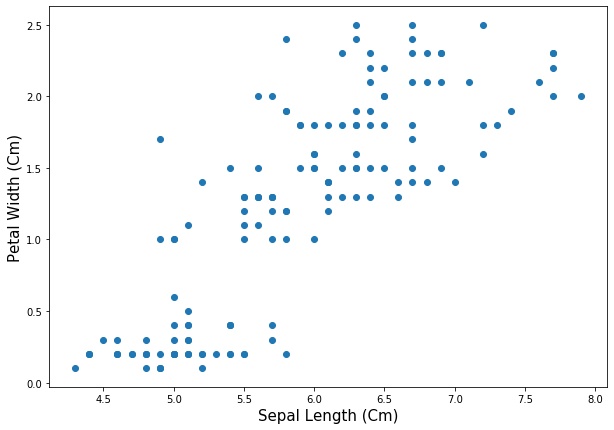

In [16]:
plt.figure(figsize = (10, 7))
plt.scatter(df.SepalLengthCm, df.PetalWidthCm)
plt.xlabel("Sepal Length (Cm)", fontsize=15)
plt.ylabel("Petal Width (Cm)", fontsize=15)
plt.show()

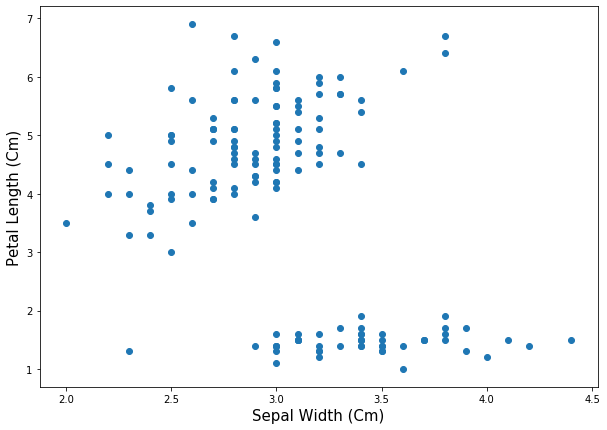

In [17]:
plt.figure(figsize = (10, 7))
plt.scatter(df.SepalWidthCm, df.PetalLengthCm)
plt.xlabel("Sepal Width (Cm)", fontsize=15)
plt.ylabel("Petal Length (Cm)", fontsize=15)
plt.show()

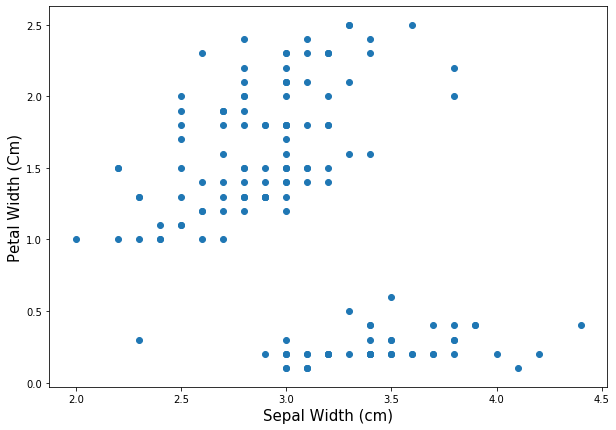

In [18]:
plt.figure(figsize = (10, 7))
plt.scatter(df.SepalWidthCm, df.PetalWidthCm)
plt.xlabel("Sepal Width (cm)", fontsize=15)
plt.ylabel("Petal Width (Cm)", fontsize=15)
plt.show()

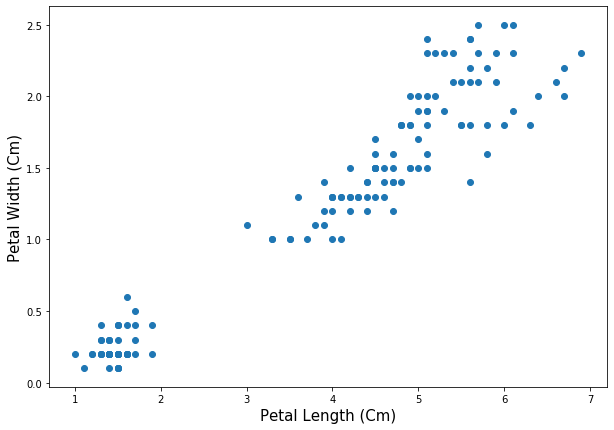

In [19]:
plt.figure(figsize = (10, 7))
plt.scatter(df.PetalLengthCm, df.PetalWidthCm)
plt.xlabel("Petal Length (Cm)", fontsize=15)
plt.ylabel("Petal Width (Cm)", fontsize=15)
plt.show()

### Visualizing the clusters

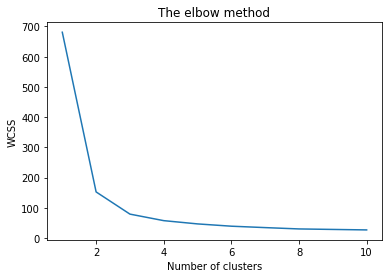

In [53]:
x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()



You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'.

In [48]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(x)

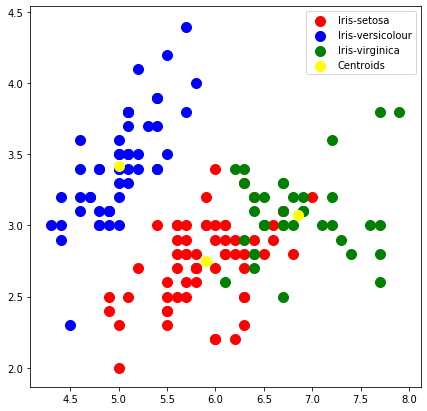

In [51]:
plt.figure(figsize = (7, 7))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()